# Read in and process experiments

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [23]:
bigN = [2, 5, 10, 20, 50, 100, 200]
deg = list(range(0,21))
sigmas = [0.01, 0.1, 1]
numCombinations = len(bigN)*len(deg)*len(sigmas)

In [62]:
def plot_report_graph(title, data):
    fig = plt.figure(figsize=(12, 4))
    fig.suptitle(title, fontsize=20)
    for i, entry in enumerate(data):
        data_dict = entry[0]
        x = entry[1]
        x_label = entry[2]
        
        y_data = []
        y_data.append([[data_dict[n][0] for n in x], "Ein"])
        y_data.append([[data_dict[n][1] for n in x], "Eout"])
        y_data.append([[data_dict[n][2] for n in x], "Ebias"])
        
        plt.subplot(1,3,i+1)
        for entry in y_data:
            y, labl = entry
            plt.plot(x, y, label=labl)
        plt.xlabel(x_label)
        plt.legend(loc="upper left")
    plt.show()

In [44]:
def process_experiments(experiments):
    n_dict, d_dict, sigma_dict = dict(), dict(), dict()
    n_dict_cst, d_dict_cst, sigma_dict_cst = dict(), dict(), dict()
    for exp in experiments:
        n, d, s = exp[0], exp[1], exp[2]

        # Averages over all variables
        n_dict[n] = n_dict.get(n, np.array([0, 0, 0])) + np.array(exp[3:6])
        d_dict[d] = d_dict.get(d, np.array([0, 0, 0])) + np.array(exp[3:6])
        sigma_dict[s] = sigma_dict.get(s, np.array([0, 0, 0])) + np.array(exp[3:6])

        # Holding other variable constant
        if d == 4 and s == 0.01:
            n_dict_cst[n] = n_dict_cst.get(n, np.array([0, 0, 0])) + np.array(exp[3:6])
        if n == 100 and s == 0.01:
            d_dict_cst[d] = d_dict_cst.get(d, np.array([0, 0, 0])) + np.array(exp[3:6])
        if n == 100 and d == 4:
            sigma_dict_cst[s] = sigma_dict_cst.get(s, np.array([0, 0, 0])) + np.array(exp[3:6])

    # Average
    n_dict = {k: x/(numCombinations/len(n_dict)) for k, x in n_dict.items()}
    d_dict = {k: x/(numCombinations/len(d_dict)) for k, x in d_dict.items()}
    sigma_dict = {k: x/(numCombinations/len(sigma_dict)) for k, x in sigma_dict.items()}
    return [n_dict, d_dict, sigma_dict, n_dict_cst, d_dict_cst, sigma_dict_cst]

In [78]:
# Read experiment file without reg
with open(".\experiments\experiments_9_1trials", "r", encoding='utf-8') as f:
    experiments = eval(f.read())
res = process_experiments(experiments) 

with open(".\experiments\experiments_reg_9_1trials", "r", encoding='utf-8') as f:
    experiments = eval(f.read())
res_reg = process_experiments(experiments) 

# Averaging combinations of parameters
In the results below, we look at the averages of Ein, Eout, and Ebias, vs parameters sample size (N), degree (d) and noise level (sigma).

For example, given sample size (N) vs Ein, Eout, Ebias, with sample size 50 this is the average of Ein with parameters d {0,..., 20}, and sigma {0.01, 0.1, 1}.

This gives us a rough idea that sample size at N=100, d=4, sigma=0.01 is ideal for tradeoff of fitting (Ein) and generalization (Eout).

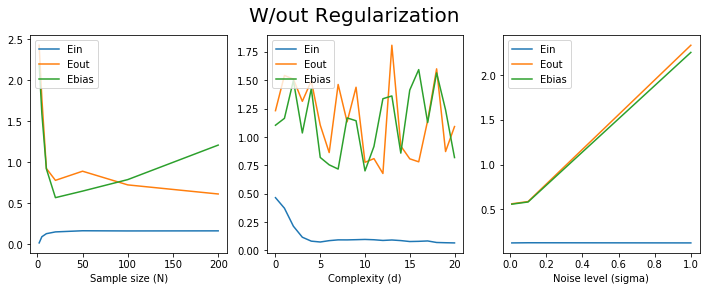

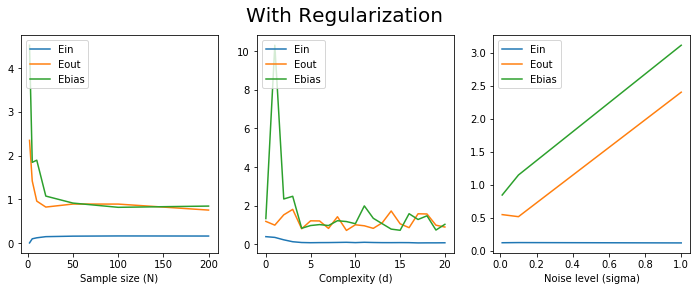

In [79]:
plot_report_graph("W/out Regularization", [[res[0], bigN, "Sample size (N)"], [res[1], deg, "Complexity (d)"], [res[2], sigmas, "Noise level (sigma)"]])
plot_report_graph("With Regularization", [[res_reg[0], bigN, "Sample size (N)"], [res_reg[1], deg, "Complexity (d)"], [res_reg[2], sigmas, "Noise level (sigma)"]])

# Keeping parameters constant
In the results below, we look at the Ein, Eout, and Ebias, vs parameters sample size (N), degree (d) and noise level (sigma), while keeping 2 parameters constant.

For example, given sample size (N) vs Ein, Eout, Ebias, take N = 50 for Ein, this is the value of Ein with sample size 50, d=4, and sigma=0.01, where d and sigma were chosen as the best tradeoff values from the previous results.

Holding the rest of the parameters constant allows us to see how Ein, Eout, Ebias changes while only changing one parameter.

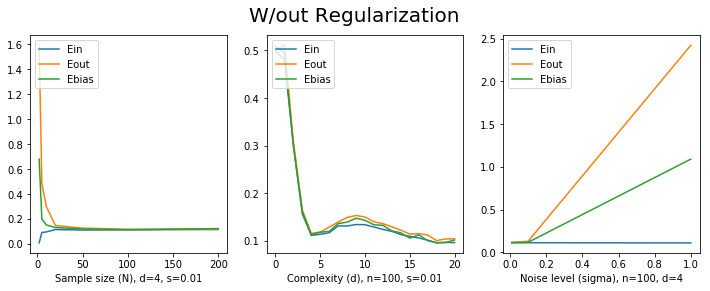

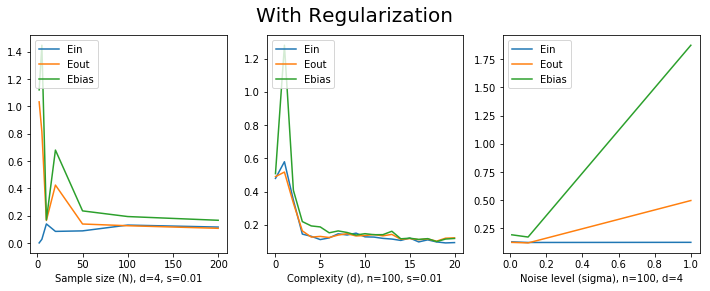

In [77]:
plot_report_graph("W/out Regularization", [[res[3], bigN, "Sample size (N), d=4, s=0.01"], [res[4], deg, "Complexity (d), n=100, s=0.01"], [res[5], sigmas, "Noise level (sigma), n=100, d=4"]])
plot_report_graph("With Regularization", [[res_reg[3], bigN, "Sample size (N), d=4, s=0.01"], [res_reg[4], deg, "Complexity (d), n=100, s=0.01"], [res_reg[5], sigmas, "Noise level (sigma), n=100, d=4"]])